# Constellation Wizard

The Notebook format allows for more control over various analyses and automation.

In [1]:
# Import libraries
from DeckAccessReader import *
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
import os
cwd = os.getcwd()
cwdFiles = cwd+'\\Files'
import seaborn as sns
from comtypes.client import CreateObject
from comtypes.client import GetActiveObject
from comtypes.gen import STKObjects
import matplotlib.pyplot as plt

# Define the constellation and Inputs

In [2]:
# Create or Load a constellation saved as TLEs
constellationName = 'Oneweb' # Either Created or loaded
create = False # 'Create' or 'Load'
accessObjPath = '*/Facility/AGI/Sensor/FOV' # Used for deck access
satTemplateName = 'OneWeb' # Used for deck access constraints and child ojects when loading satellites. This can be an empty string '' 
startTimeDA = 0 # Deck Access start time. Relative to the scenario start time [EpSec]
stopTimeDA = 3600 # Deck Access stop time. Relative to the scenario start time [EpSec]

## Connect To STK

In [3]:
scenarioPath = cwd+'\\ConstellationWizardExampleScenario'
scenarioName = 'ConstellationWizardExample'
root = ConnectToSTK(version=12,scenarioPath = scenarioPath,scenarioName=scenarioName) # Tries to connect to open scenario,then Load scenario,then create new scenario
sc = root.CurrentScenario
sc2 = root.CurrentScenario.QueryInterface(STKObjects.IAgScenario)

# Turn on Antialiasing for better visualization. Options are: Off,FXAA,2,3,4
cmd = 'SoftVtr3d * AntiAlias FXAA'
root.ExecuteCommand(cmd);

## Create the constellation if needed

In [4]:
TLEFileName = cwdFiles+'\\Constellations\\'+constellationName+'.tce'
if create == True:
    CreateConstellation(root,TLEFileName,ssc=00000)
    print(TLEFileName+' Created\n')

## Look at TLEs

In [5]:
tleList = getTLEs(TLEFileName)
dfTLE = tleListToDF(tleList)
dfTLE

,Line1,Ssc,Launch,Epoch,Mean motion 1st,Mean motion 2nd,Drag,Eph Type,Elem Set,Line2,Ssc2,i,RAAN,e,AoP,MA,Mean motion,a
0,1,00000,,19337.16666667,.00000053,00000-0,14137-3,0,00006,2,00000,87.9321,343.4344,0009837,271.3469,155.1485,13.152567,7581.028896
1,1,00001,,19337.16666667,.00000254,00000-0,67841-3,0,00000,2,00001,87.9321,343.4344,0009836,271.3335,164.1621,13.152565,7581.029664
2,1,00002,,19337.16666667,.00000420,00000-0,11209-2,0,00002,2,00002,87.9321,343.4344,0009835,271.3166,173.1790,13.152563,7581.030256
3,1,00003,,19337.16666667,.00000567,00000-0,15134-2,0,00006,2,00003,87.9321,343.4344,0009835,271.2944,182.2013,13.152562,7581.030775
4,1,00004,,19337.16666667,.00000686,00000-0,18318-2,0,00006,2,00004,87.9321,343.4344,0009834,271.2665,191.2293,13.152561,7581.031193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,00715,,19337.16666667,-.00000714,00000-0,-19054-2,0,00002,2,00715,87.8585,156.8454,0009834,271.4473,109.8425,13.152573,7581.026590
716,1,00716,,19337.16666667,-.00000639,00000-0,-17062-2,0,00006,2,00716,87.8585,156.8454,0009834,271.4175,118.8724,13.152572,7581.026940
717,1,00717,,19337.16666667,-.00000515,00000-0,-13753-2,0,00003,2,00717,87.8585,156.8454,0009835,271.3928,127.8972,13.152570,7581.027474
718,1,00718,,19337.16666667,-.00000350,00000-0,-93445-3,0,00008,2,00718,87.8585,156.8454,0009835,271.3737,136.9164,13.152569,7581.028150


## Load TLE file as a MTO

In [6]:
LoadMTO(root,TLEFileName,timestep=60,color='green',orbitsOnOrOff='off',orbitFrame='Inertial')

## Run Deck Access

In [7]:
# Run deck Access, using a constraint object if it exists
startTime = sc2.StartTime+startTimeDA
stopTime = sc2.StartTime+stopTimeDA
NumOfSC,deckAccessFileName,deckAccessTLEFileName = runDeckAccess(root,startTime,stopTime,TLEFileName,accessObjPath,constraintSatName=satTemplateName)
NumOfSC

83

In [8]:
# Read deck access report file
dfAccess = deckAccessReportToDF(deckAccessFileName)
dfAccess

,Name,Start Time (UTCG),Stop Time (UTCG),Duration (sec)
0,00266,3 Dec 2019 04:29:57.354,3 Dec 2019 04:31:19.282,81.928
1,00267,3 Dec 2019 04:26:32.731,3 Dec 2019 04:29:11.600,158.869
2,00268,3 Dec 2019 04:23:22.453,3 Dec 2019 04:26:49.738,207.285
3,00269,3 Dec 2019 04:20:17.752,3 Dec 2019 04:24:22.472,244.720
4,00270,3 Dec 2019 04:17:16.351,3 Dec 2019 04:21:52.071,275.720
...,...,...,...,...
78,00390,3 Dec 2019 04:18:08.541,3 Dec 2019 04:21:15.640,187.099
79,00391,3 Dec 2019 04:15:53.002,3 Dec 2019 04:18:06.285,133.283
80,00415,3 Dec 2019 04:59:10.103,3 Dec 2019 05:00:00.000,49.897
81,00416,3 Dec 2019 04:56:53.113,3 Dec 2019 04:59:15.862,142.749


In [9]:
LoadMTO(root,deckAccessTLEFileName,timestep=60,color='cyan',orbitsOnOrOff='off',orbitFrame='Inertial')

## Look at TLEs with access

In [10]:
# Look at the TLEs with Access 
tleList = getTLEs(deckAccessTLEFileName)
dfTLEwAccess = tleListToDF(tleList)
# NewTLEFileName = TLEFileName + 'DeckAccess'
# dfToTLE(dfTLEwAccess,NewTLEFileName) # Example of how to save DeckAccess satellites to a TCE file
dfTLEwAccess

,Line1,Ssc,Launch,Epoch,Mean motion 1st,Mean motion 2nd,Drag,Eph Type,Elem Set,Line2,Ssc2,i,RAAN,e,AoP,MA,Mean motion,a
0,1,00266,,19337.16666667,.00000020,00000-0,54117-4,0,00001,2,00266,87.8247,044.6403,0009884,271.5023,028.9658,13.152564,7581.029945
1,1,00267,,19337.16666667,-.00000087,00000-0,-23365-3,0,00007,2,00267,87.8247,044.6403,0009879,271.5324,037.9355,13.152565,7581.029430
2,1,00268,,19337.16666667,-.00000213,00000-0,-56977-3,0,00004,2,00268,87.8247,044.6403,0009873,271.5560,046.9118,13.152567,7581.028861
3,1,00269,,19337.16666667,-.00000345,00000-0,-92189-3,0,00006,2,00269,87.8247,044.6403,0009866,271.5699,055.8977,13.152568,7581.028285
4,1,00270,,19337.16666667,-.00000470,00000-0,-12560-2,0,00001,2,00270,87.8247,044.6404,0009858,271.5720,064.8956,13.152570,7581.027758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,00390,,19337.16666667,-.00000469,00000-0,-12534-2,0,00000,2,00390,87.7960,075.2436,0009858,271.5717,064.8459,13.152569,7581.028100
79,1,00391,,19337.16666667,-.00000605,00000-0,-16168-2,0,00000,2,00391,87.7960,075.2436,0009851,271.5615,073.8560,13.152570,7581.027570
80,1,00415,,19337.16666667,-.00000128,00000-0,-34065-3,0,00009,2,00415,87.7927,085.4445,0009887,271.2477,290.1513,13.152564,7581.029906
81,1,00416,,19337.16666667,-.00000160,00000-0,-42650-3,0,00005,2,00416,87.7927,085.4445,0009888,271.2777,299.1213,13.152564,7581.029883


## Load subset of Satellites

In [11]:
# dfLoad = dfTLE # Load all satellites in TLE files
# dfLoad = dfTLE[dfTLE['i']>45] # Use subset based on filtering
# dfLoad = dfTLEwAccess[(dfTLEwAccess['i']>45) & (dfTLEwAccess['RAAN'].astype(float)>180)] # Use subset based on deck access and filtering
dfLoad = dfTLEwAccess # Use subset based on deck access
# dfLoad = dfLoad.head()
dfLoad

,Line1,Ssc,Launch,Epoch,Mean motion 1st,Mean motion 2nd,Drag,Eph Type,Elem Set,Line2,Ssc2,i,RAAN,e,AoP,MA,Mean motion,a
0,1,00266,,19337.16666667,.00000020,00000-0,54117-4,0,00001,2,00266,87.8247,044.6403,0009884,271.5023,028.9658,13.152564,7581.029945
1,1,00267,,19337.16666667,-.00000087,00000-0,-23365-3,0,00007,2,00267,87.8247,044.6403,0009879,271.5324,037.9355,13.152565,7581.029430
2,1,00268,,19337.16666667,-.00000213,00000-0,-56977-3,0,00004,2,00268,87.8247,044.6403,0009873,271.5560,046.9118,13.152567,7581.028861
3,1,00269,,19337.16666667,-.00000345,00000-0,-92189-3,0,00006,2,00269,87.8247,044.6403,0009866,271.5699,055.8977,13.152568,7581.028285
4,1,00270,,19337.16666667,-.00000470,00000-0,-12560-2,0,00001,2,00270,87.8247,044.6404,0009858,271.5720,064.8956,13.152570,7581.027758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,00390,,19337.16666667,-.00000469,00000-0,-12534-2,0,00000,2,00390,87.7960,075.2436,0009858,271.5717,064.8459,13.152569,7581.028100
79,1,00391,,19337.16666667,-.00000605,00000-0,-16168-2,0,00000,2,00391,87.7960,075.2436,0009851,271.5615,073.8560,13.152570,7581.027570
80,1,00415,,19337.16666667,-.00000128,00000-0,-34065-3,0,00009,2,00415,87.7927,085.4445,0009887,271.2477,290.1513,13.152564,7581.029906
81,1,00416,,19337.16666667,-.00000160,00000-0,-42650-3,0,00005,2,00416,87.7927,085.4445,0009888,271.2777,299.1213,13.152564,7581.029883


In [12]:
# Load satellites using a satellite template
LoadSatsUsingTemplate(root,dfLoad,startTime,stopTime,TLEFileName,satTemplateName,color='green')

## Perform Analysis

In [13]:
def chainAnalysis(root,chainPath,objsToAdd,startTime,stopTime,exportFileName):
    chain = root.GetObjectFromPath(chainPath)
    chain2 = chain.QueryInterface(STKObjects.IAgChain)
    chain2.Objects.RemoveAll()
    for obj in objsToAdd:
        chain2.Objects.Add(obj)
    chain2.ClearAccess()
    chain2.ComputeAccess()
    cmd = 'ReportCreate '+chainPath+' Type Export Style "Bent Pipe Comm Link" File "'+exportFileName+'" TimePeriod "'+str(startTime)+'" "'+str(stopTime)+'" TimeStep 60'
    root.ExecuteCommand(cmd)
    df = pd.read_csv(exportFileName)
    df = df[df.columns[:-1]]
    return df
    
def covAnalysis(root,covDefPath,objsToAdd,exportFileName):
    cov= root.GetObjectFromPath(covDefPath)
    cov2 = cov.QueryInterface(STKObjects.IAgCoverageDefinition)
    cov2.AssetList.RemoveAll()
    for obj in objsToAdd:
        cov2.AssetList.Add(obj)
    cov2.ClearAccesses()
    cov2.ComputeAccesses()
    cmd = 'ReportCreate '+covDefPath+'/FigureOfMerit/NAsset Type Export Style "Value By Grid Point" File "'+exportFileName+'"'
    root.ExecuteCommand(cmd)
    f = open(exportFileName,'r')
    txt = f.readlines()
    f.close()
    k = 0
    for line in txt:
        if 'Latitude' in line:
            start = k
            break
        k += 1
    f = open(exportFileName+'Temp','w')
    for line in txt[start:-1]:
        f.write(line) 
    f.close()
    df = pd.read_csv(exportFileName+'Temp')
    os.remove(exportFileName+'Temp')
    return df

def commSysAnalysis(root,commSysPath,accessReceiver,objsToAdd,exportFileName):
    commSys= root.GetObjectFromPath(commSysPath)
    commSys2 = commSys.QueryInterface(STKObjects.IAgCommSystem)
    commSys2.InterferenceSources.RemoveAll()
    for obj in objsToAdd:
        commSys2.InterferenceSources.Add(obj)
    cmd = 'ReportCreate '+commSysPath+' Type Export Style "Link Information" File "'+exportFileName+'" AdditionalData "'+accessReceiver+'"'
    root.ExecuteCommand(cmd)
    df = pd.read_csv(exportFileName,header=4)
    return df

In [14]:
chainPath = '*/Chain/AGIToConstellation'
accessReceiver = '*/Facility/AGI/Sensor/FOV/Receiver/GroundReceiver'
objsToAdd = ['*/Constellation/OneWebTransmitters',accessReceiver]
exportFileName = cwdFiles+'\\AnalysisResults\\'+constellationName+'ChainComm.csv'
exportFileDir = cwdFiles+'\\AnalysisResults\\'
if os.path.isdir(exportFileDir):
    pass
else:
    os.mkdir(exportFileDir)
dfChainData = chainAnalysis(root,chainPath,objsToAdd,startTime,stopTime,exportFileName)

dfChainData

,Time (UTCG),Xmtr Power1 (dBW),Xmtr Gain1 (dB),EIRP1 (dBW),Prop Loss1 (dB),Rcvd. Frequency1 (GHz),Rcvd. Iso. Power1 (dBW),Flux Density1 (dBW/m^2),g/T1 (dB/K),C/No1 (dB*Hz),Bandwidth1 (kHz),C/N1 (dB),Eb/No1 (dB),BER1
0,3 Dec 2019 04:29:57.346,34.6,0.0,34.6,181.1546,13.500037,-146.555,-102.492266,20.0,102.044512,199800.0,19.0386,16.0283,0.000119
1,3 Dec 2019 04:30:57.000,34.6,0.0,34.6,181.1014,13.499981,-146.501,-102.439075,20.0,102.097703,199800.0,19.0917,16.0814,0.000110
2,3 Dec 2019 04:31:19.274,34.6,0.0,34.6,181.1634,13.499961,-146.563,-102.501061,20.0,102.035718,199800.0,19.0298,16.0195,0.000121
3,3 Dec 2019 04:26:32.719,34.6,0.0,34.6,181.1500,13.500073,-146.550,-102.487648,20.0,102.049131,199800.0,19.0432,16.0329,0.000119
4,3 Dec 2019 04:27:32.000,34.6,0.0,34.6,180.8839,13.500018,-146.284,-102.221513,20.0,102.315266,199800.0,19.3093,16.2990,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,3 Dec 2019 04:57:53.000,34.6,0.0,34.6,180.9195,13.500010,-146.320,-102.257148,20.0,102.279631,199800.0,19.2737,16.2634,0.000083
603,3 Dec 2019 04:58:53.000,34.6,0.0,34.6,181.0345,13.499951,-146.435,-102.372157,20.0,102.164622,199800.0,19.1587,16.1484,0.000099
604,3 Dec 2019 04:59:15.857,34.6,0.0,34.6,181.1668,13.499929,-146.567,-102.504478,20.0,102.032300,199800.0,19.0263,16.0160,0.000122
605,3 Dec 2019 04:54:56.872,34.6,0.0,34.6,181.1569,13.500024,-146.557,-102.494583,20.0,102.042195,199800.0,19.0362,16.0259,0.000120


In [15]:
covDefPath = '*/CoverageDefinition/CovUS'
objsToAdd = ['Constellation/'+constellationName]
exportFileName = cwdFiles+'\\AnalysisResults\\'+constellationName+'NAsset.csv'
dfCovAnalysis = covAnalysis(root,covDefPath,objsToAdd,exportFileName)
dfCovAnalysis

,Latitude (deg),Longitude (deg),FOM Value
0,26.463,262.286,18
1,26.463,279.429,22
2,29.159,262.286,18
3,29.159,269.143,21
4,31.855,248.571,10
...,...,...,...
77,48.029,255.000,15
78,48.029,259.286,16
79,48.029,263.571,17
80,48.029,267.857,17


In [16]:
commSysPath = '*/CommSystem/InterferanceAnalysis'
accessReceiver = 'Facility/AGI/Sensor/FOV/Receiver/GroundReceiver'
objsToAdd = ['*/Constellation/OneWebTransmitters']
exportFileName = cwdFiles+'\\AnalysisResults\\'+constellationName+'InterferanceLinkBudget.csv'
dfCommSys = commSysAnalysis(root,commSysPath,accessReceiver,objsToAdd,exportFileName)
dfCommSys

,Time (UTCG),Link To ID,Xmtr Power (dBW),Xmtr Gain (dB),EIRP (dBW),Xmtr Azimuth - Phi (deg),Xmtr Elevation - Theta (deg),Rcvr Azimuth - Phi (deg),Rcvr Elevation - Theta (deg),Rcvd. Frequency (GHz),...,Bandwidth Overlap (units),C/N (dB),C/(N+I) (dB),Eb/No (dB),Eb/(No+Io) (dB),BER,BER+I,C/I (dB),DeltaT/T (units),Pwr Flux Density (dBW/m^2)
0,3 Dec 2019 04:00:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-16.3019,13.95,-13.2916,9.128562e-13,0.379745,-16.2937,528.859144,-117.841356
1,3 Dec 2019 04:01:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.8990,13.95,-12.8887,9.128562e-13,0.374224,-15.8900,481.912409,-118.152301
2,3 Dec 2019 04:02:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.6083,13.95,-12.5980,9.128562e-13,0.370096,-15.5987,450.654626,-118.527283
3,3 Dec 2019 04:03:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-16.2874,13.95,-13.2771,9.128562e-13,0.379551,-16.2792,527.096726,-117.815550
4,3 Dec 2019 04:04:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.5558,13.95,-12.5455,9.128562e-13,0.369336,-15.5460,445.217855,-118.524948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,4 Dec 2019 03:56:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.9079,13.95,-12.8976,9.128561e-13,0.374349,-15.8990,482.911683,-118.153286
1437,4 Dec 2019 03:57:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.6106,13.95,-12.6003,9.128561e-13,0.370129,-15.6010,450.891872,-118.536429
1438,4 Dec 2019 03:58:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-16.2918,13.95,-13.2815,9.128561e-13,0.379610,-16.2836,527.634175,-117.820941
1439,4 Dec 2019 03:59:00.000,0,35.0,0.0,35.0,0.0,0.0,0.0,0.0,13.6,...,1.0,10.9397,-15.5630,13.95,-12.5527,9.128561e-13,0.369442,-15.5533,445.967389,-118.528948


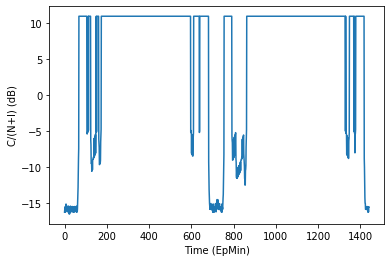

In [24]:
# See Interferance Effects on link
plt.plot(dfCommSys['C/(N+I) (dB)'])
plt.xlabel('Time (EpMin)')
plt.ylabel('C/(N+I) (dB)');

This is the section where you will need to modify the code to perform the type of analysis you need, it could involve sensors, chains, coverage etc. As well as save results.

A perfectly reasonable alternative to writing the code to do this is to just do all of the analysis manually inside STK's GUI and use the rest of the script to set up your scenario. If that is the case use, the ConstellationWizardUI may be easier to use.

## Unload Satellites, Constellations, and MTOs

In [25]:
UnloadObjs(root,'Satellite',pattern='tle-*')
UnloadObjs(root,'Constellation',pattern='One*')
UnloadObjs(root,'MTO',pattern='*')

Rinse and Repeat!

Rerunning the notebook with different parameters gives the ability to quickly run analysis and trade studies on subsets of large constellations over different time periods, facility locations, constellation patterns, etc. 

Converting this notebook to a .py file and putting the contents into a for loop would be recommended for large analyses.
